## **Chapter 5: Getting Started with pandas**

- **pandas** là một thư viện mạnh trong Python dùng để làm sạch, xử lý và phân tích dữ liệu một cách nhanh chóng và tiện lợi.
- Thường được dùng cùng với các thư viện như:
    - matplotlib (vẽ biểu đồ),
    - scikit-learn, statsmodels (phân tích, học máy).
    - pandas được phát triển từ năm 2010 và đến nay đã có hơn 2.500 người đóng góp, là một dự án cộng đồng mã nguồn mở từ năm 2013.
- Trong sách, tác giả dùng quy ước import chuẩn:

In [116]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

- Series: dữ liệu 1 chiều (giống 1 cột).
- DataFrame: dữ liệu 2 chiều (giống bảng).

### **5.1 Introduction to pandas Data Structures**

#### **Series**

Series là một mảng 1 chiều trong pandas, giống NumPy array nhưng có thêm **nhãn (index)** cho từng phần tử.

In [117]:
obj = pd.Series([4, 7, -5, 3])
print(obj)

0    4
1    7
2   -5
3    3
dtype: int64


📌 Nếu không chỉ định index, pandas sẽ tạo index mặc định là 0, 1, 2,…

Bạn có thể truy cập:

In [118]:
obj.array   # dữ liệu

<NumpyExtensionArray>
[4, 7, -5, 3]
Length: 4, dtype: int64

In [119]:
obj.index   # index

RangeIndex(start=0, stop=4, step=1)

**Series có nhãn tùy chỉnh**

In [120]:
obj2 = pd.Series([4, 7, -5, 3], index=["a", "b", "c", "d"])  # Gán index tùy ý
obj2

a    4
b    7
c   -5
d    3
dtype: int64

👉 Truy cập theo nhãn:

In [121]:
obj2["a"]     # -5
obj2[["c", "a", "d"]]

c   -5
a    4
d    3
dtype: int64

**Series hỗ trợ các thao tác như NumPy**

In [122]:
obj2[obj2 > 0]     # lọc

a    4
b    7
d    3
dtype: int64

In [123]:
obj2 * 2           # nhân

a     8
b    14
c   -10
d     6
dtype: int64

In [124]:
np.exp(obj2)       # dùng hàm numpy

a      54.598150
b    1096.633158
c       0.006738
d      20.085537
dtype: float64

**Series giống từ điển**

In [125]:
"b" in obj2

True

In [126]:
"e" in obj2 

False

Bạn có thể tạo Series từ dict:

In [127]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Hoặc ép index theo thứ tự mong muốn:

In [128]:
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Nếu key không tồn tại, giá trị sẽ là NaN.

**Kiểm tra giá trị thiếu (NaN)**

In [129]:
pd.isna(obj4)
obj4.notna()      # cũng được

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

**Cộng Series – tự động căn chỉnh theo index**

In [130]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

📌 Các nhãn được ghép giống như phép **join** trong cơ sở dữ liệu.

**Đặt tên cho Series và index**

In [131]:
obj4.name = "population"
obj4.index.name = "state"
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

**Thay đổi index**

In [132]:
obj.index = ["Bob", "Steve", "Jeff", "Ryan"]
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

#### **DataFrame**

##### **🧱 DataFrame là gì?**
- Là một bảng dữ liệu hai chiều (giống như bảng Excel).
- Mỗi **cột** là một **Series**, và các Series này **dùng chung chỉ mục (index)**.
- Có thể chứa nhiều kiểu dữ liệu khác nhau trong từng cột (số, chuỗi, Boolean…).

##### **🛠 Cách tạo DataFrame phổ biến nhất**

In [133]:
data = {
    "state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
    "year": [2000, 2001, 2002, 2001, 2002, 2003],
    "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


##### **📋 Truy cập dữ liệu**

- Truy cập **cột**:

In [134]:
frame["state"]
frame.year  # Chỉ dùng được nếu tên cột là tên hợp lệ trong Python

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

- Truy cập **dòng**:

In [135]:
frame.loc[1]   # Theo label

state    Ohio
year     2001
pop       1.7
Name: 1, dtype: object

In [136]:
frame.iloc[2]  # Theo vị trí

state    Ohio
year     2002
pop       3.6
Name: 2, dtype: object

##### **🪄 Tùy chỉnh và thao tác với cột**

- **Thêm cột mới:**

In [137]:
frame["debt"] = 16.5        # Gán 1 giá trị duy nhất cho toàn bộ cột
frame

,state,year,pop,debt
0,Ohio,2000,1.5,16.5
1,Ohio,2001,1.7,16.5
2,Ohio,2002,3.6,16.5
3,Nevada,2001,2.4,16.5
4,Nevada,2002,2.9,16.5
5,Nevada,2003,3.2,16.5


In [138]:
frame["debt"] = np.arange(6.)  # Gán mảng có cùng độ dài
frame

,state,year,pop,debt
0,Ohio,2000,1.5,0.0
1,Ohio,2001,1.7,1.0
2,Ohio,2002,3.6,2.0
3,Nevada,2001,2.4,3.0
4,Nevada,2002,2.9,4.0
5,Nevada,2003,3.2,5.0


- **Gán Series có chỉ mục riêng** (sẽ được căn chỉnh theo index của DataFrame):

In [139]:
val = pd.Series([-1.2, -1.5, -1.7], index=["two", "four", "five"])
frame["debt"] = val
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

- **Xóa cột**:

In [140]:
del frame["debt"]

##### **🔄 Chuyển đổi dữ liệu**

- **Chuyển đổi từ dictionary lồng nhau**:

In [141]:
populations = {
    "Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6},
    "Nevada": {2001: 2.4, 2002: 2.9}
}
frame3 = pd.DataFrame(populations)
frame3

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


- **Chuyển vị (transpose)**:

In [142]:
frame3.T

,2000,2001,2002
Ohio,1.5,1.7,3.6
Nevada,NaN,2.4,2.9


- **Chỉ định index cụ thể khi tạo từ nested dict**:

In [143]:
pd.DataFrame(populations, index=[2001, 2002, 2003])

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9
2003,NaN,NaN


##### **🔎 Một số điểm cần lưu ý**
- frame[col] trả về một **view**, không phải **copy**.
- Dot notation (frame.year) không dùng được nếu tên cột có dấu cách hoặc ký tự đặc biệt.
- Nếu gán giá trị với độ dài không khớp số dòng, sẽ báo lỗi.
- Dùng `frame.head()` để xem 5 dòng đầu, `frame.tail()` để xem 5 dòng cuối.

#### **Index Objects**

Trong pandas, **Index** là đối tượng lưu trữ **nhãn trục (axis labels)** – ví dụ như tên cột của DataFrame hoặc chỉ số dòng của Series. Khi bạn tạo một Series hoặc DataFrame với danh sách nhãn, pandas sẽ tự động chuyển chúng thành Index.

In [144]:
obj = pd.Series(np.arange(3), index=["a", "b", "c"])
index = obj.index
print(index)           # Index(['a', 'b', 'c'], dtype='object')
print(index[1:])       # Index(['b', 'c'], dtype='object')

Index(['a', 'b', 'c'], dtype='object')
Index(['b', 'c'], dtype='object')


##### **🧊 Tính bất biến (Immutable)**

Index **không thể thay đổi** sau khi được tạo:

In [145]:
index[1] = "d"  # ❌ Gây lỗi: TypeError

TypeError: Index does not support mutable operations

Điều này giúp bạn **chia sẻ Index giữa các cấu trúc dữ liệu** một cách an toàn:

In [146]:
labels = pd.Index(np.arange(3))
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print(obj2.index is labels)  # ✅ True

True


##### **🔍 Index hoạt động giống như tập hợp (set)**

Bạn có thể tra cứu:

In [147]:
print("Ohio" in frame3.columns)  # ✅ True
print(2003 in frame3.index)      # ❌ False

True
False


Tuy nhiên, khác với set, Index **cho phép nhãn trùng lặp**:

In [148]:
pd.Index(["foo", "foo", "bar", "bar"])
# Index(['foo', 'foo', 'bar', 'bar'])

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Nếu bạn truy xuất theo nhãn trùng, pandas sẽ trả về **tất cả các mục khớp**.

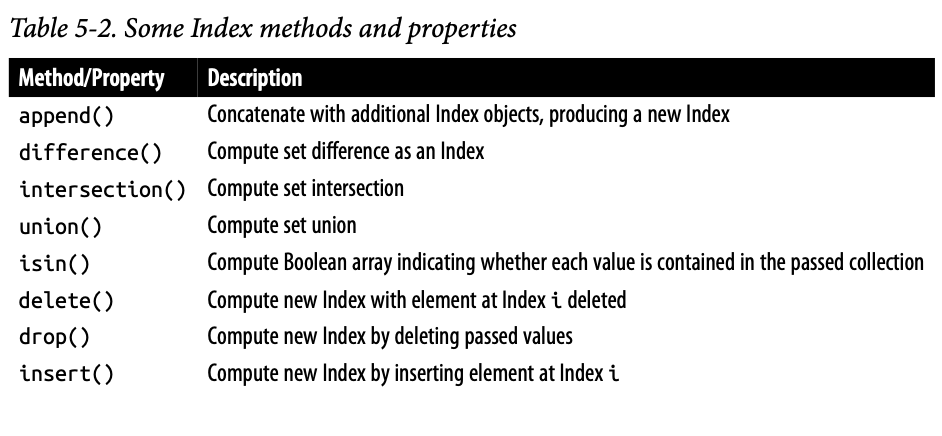
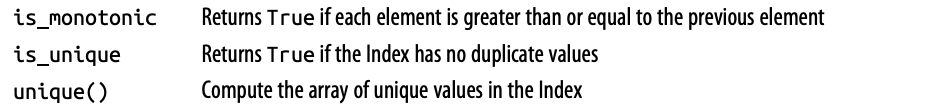

### **5.2 Essential Functionality**

**Phần này sẽ hướng dẫn bạn những thao tác cơ bản với dữ liệu trong Series và DataFrame.**

Trong các chương tiếp theo, chúng ta sẽ đi sâu vào các chủ đề về **phân tích và xử lý dữ liệu** bằng pandas.

**📚 Lưu ý:**
Cuốn sách này **không nhằm mục đích cung cấp tài liệu toàn diện** về thư viện pandas. Thay vào đó, mục tiêu là giúp bạn l**àm quen với những tính năng được sử dụng thường xuyên nhất**.
Những tính năng ít gặp hoặc nâng cao hơn (còn gọi là **esoteric**) bạn có thể tự khám phá thêm qua **tài liệu chính thức của pandas trên mạng**.

#### **Reindexing**

**Reindexing** là thao tác tạo ra một đối tượng pandas mới, với dữ liệu được sắp xếp lại hoặc mở rộng/thu hẹp theo chỉ số (index) hoặc tên cột (columns) mới.
- Nếu index/cột mới có nhãn chưa từng xuất hiện, pandas sẽ tự động chèn giá trị thiếu (NaN).
- Có thể áp dụng cho cả Series và DataFrame.

In [149]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
print(obj)

obj2 = obj.reindex(["a", "b", "c", "d", "e"])
print(obj2)


d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64


- Dữ liệu được sắp xếp lại theo thứ tự index mới.

- "e" không có dữ liệu nên trả về NaN.

**Điền giá trị khi reindex (fill)**

Khi reindex với dữ liệu có thứ tự (như chuỗi thời gian), bạn có thể dùng các phương pháp điền giá trị bị thiếu:
- `ffill`: Điền tiến (lấy giá trị trước đó).
- `bfill`: Điền lùi (lấy giá trị sau đó).

In [150]:
obj3 = pd.Series(["blue", "purple", "yellow"], index=[0, 2, 4])
obj3_reindexed = obj3.reindex(range(6), method="ffill")
print(obj3_reindexed)

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object


- Các giá trị bị thiếu sẽ được điền bằng giá trị gần nhất phía trước.

**Reindex với DataFrame**

Có thể reindex theo hàng (index), cột (columns), hoặc cả hai.

In [151]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=["a", "c", "d"],
                     columns=["Ohio", "Texas", "California"])

frame2 = frame.reindex(index=["a", "b", "c", "d"])
print(frame2)

   Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0


- Hàng "b" không có dữ liệu nên toàn bộ là NaN.

Reindex cột:

In [152]:
states = ["Texas", "Utah", "California"]
frame3 = frame.reindex(columns=states)
print(frame3)

   Texas  Utah  California
a      1   NaN           2
c      4   NaN           5
d      7   NaN           8


- Cột "Utah" không có dữ liệu nên là NaN.
- Cột "Ohio" bị loại bỏ.

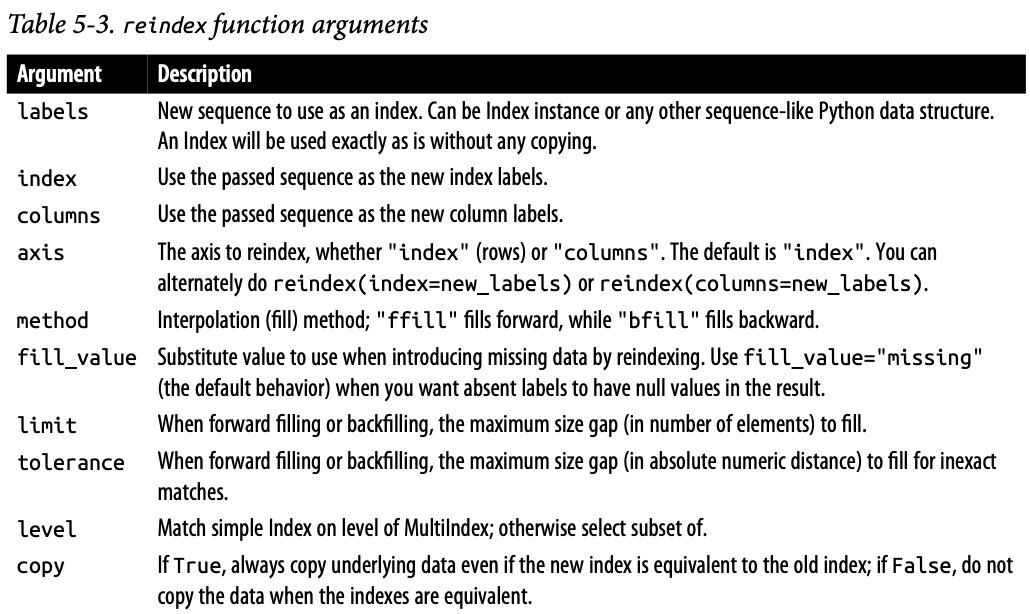

**💡 Lưu ý**
- Dùng `.loc` để chọn lại index/cột chỉ được nếu nhãn đã tồn tại (không tự động thêm NaN như reindex).
- Reindex cực kỳ hữu ích khi cần chuẩn hóa dữ liệu đầu vào, ghép nối hoặc trực quan hóa.

#### **Dropping Entries from an Axis**

- **Dropping** là thao tác **xóa một hoặc nhiều phần tử** (entries) khỏi một trục (axis) của Series hoặc DataFrame.

- Có thể xóa theo **hàng** (index) hoặc **cột** (columns).

- Sử dụng phương thức `.drop()` để thực hiện nhanh chóng, trả về **đối tượng mới** (không thay đổi dữ liệu gốc).



##### **🔎 Xóa phần tử trong Series**

In [153]:
obj = pd.Series(np.arange(5.), index=["a", "b", "c", "d", "e"])
print(obj)

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64


**✨ Xóa một phần tử:**

In [154]:
new_obj = obj.drop("c")
print(new_obj)

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64


**✨ Xóa nhiều phần tử cùng lúc:**

In [155]:
obj2 = obj.drop(["d", "c"])
print(obj2)

a    0.0
b    1.0
e    4.0
dtype: float64


**📝 Ghi chú:**

`.drop()` không làm thay đổi Series gốc, mà trả về một Series mới đã loại bỏ các phần tử chỉ định.

##### **📊 Xóa dữ liệu trong DataFrame**

Tương tự, bạn có thể xóa hàng hoặc cột trong DataFrame bằng `.drop()`:

In [156]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


**✨ Xóa hàng (theo index):**

In [157]:
data2 = data.drop(index=["Colorado", "Ohio"])
print(data2)

          one  two  three  four
Utah        8    9     10    11
New York   12   13     14    15


**✨ Xóa cột (theo columns):**

In [158]:
data3 = data.drop(columns=["two"])
print(data3)

          one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15


**✨ Cách khác để xóa cột (dùng axis):**

In [159]:
data4 = data.drop("two", axis=1)
print(data4)

          one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15


Hoặc xóa nhiều cột:

In [160]:
data5 = data.drop(["two", "four"], axis="columns")
print(data5)

          one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
New York   12     14


##### **⚙️ Tóm tắt các tham số quan trọng của `.drop()`**

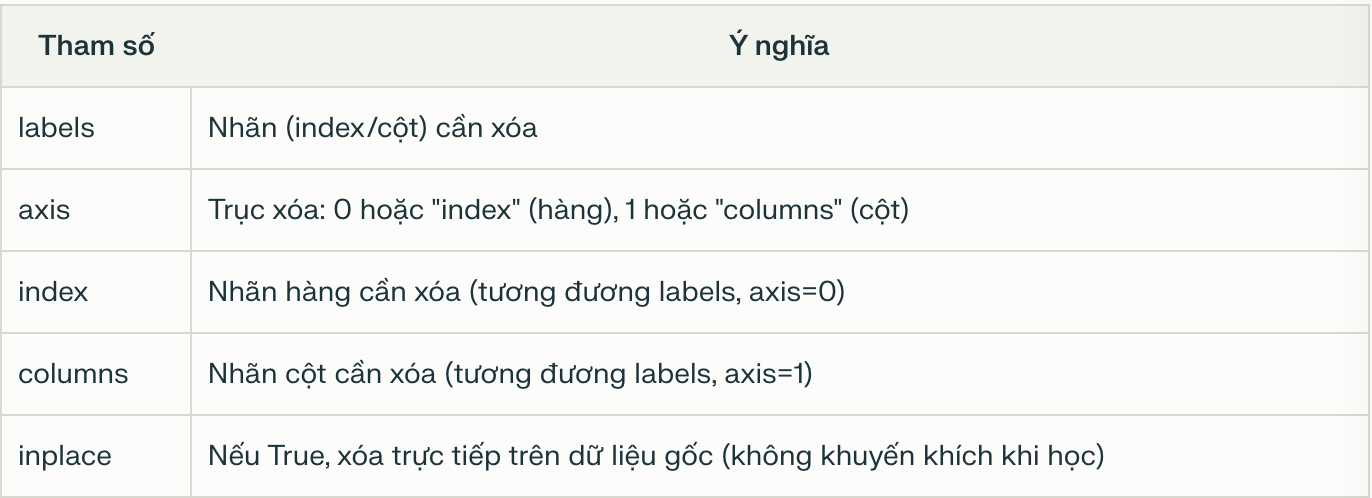

**💡 Lưu ý**
- `.drop()` luôn trả về đối tượng mới trừ khi đặt inplace=True.
- Nếu xóa nhãn không tồn tại, pandas sẽ báo lỗi (có thể dùng errors='ignore' để bỏ qua lỗi này).

#### **Indexing, Selection, and Filtering**

- **Indexing**: Truy cập dữ liệu theo **chỉ số** (index) hoặc **nhãn** (label).

- **Selection**: Chọn một hoặc nhiều phần tử, hàng, hoặc cột từ **Series** hoặc **DataFrame**.

- **Filtering**: Lọc dữ liệu dựa trên điều kiện logic (ví dụ: giá trị lớn hơn 5).

##### **🔢 Indexing trong Series**

Bạn có thể truy cập phần tử trong **Series** bằng:

- **Nhãn (label):**

In [161]:
obj = pd.Series([0.0, 1.0, 2.0, 3.0], index=["a", "b", "c", "d"])
print(obj["b"])

1.0


- **Vị trí số nguyên (integer position)**:

In [162]:
print(obj[1]) 

1.0


/var/folders/bg/hsvxykxj7yx0jz1nrhc3k6z40000gn/T/ipykernel_47742/1411920650.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(obj[1])


- **Slicing (cắt đoạn):**

In [163]:
print(obj[2:4]) 

c    2.0
d    3.0
dtype: float64


##### **🧲 loc và iloc: Truy cập an toàn, rõ ràng**

- **`.loc[]`**: Truy cập theo **label** (nhãn).

In [164]:
obj.loc[["b", "a", "d"]]

b    1.0
a    0.0
d    3.0
dtype: float64

- **`.iloc[]`**: Truy cập theo **vị trí số nguyên** (giống NumPy).

In [165]:
obj.iloc[[0, 1, 2]]

a    0.0
b    1.0
c    2.0
dtype: float64

**⚠️ Lưu ý:**
- Nếu index là số nguyên, dùng `[]` có thể gây nhầm lẫn giữa label và vị trí.

- **Khuyến nghị**: Luôn ưu tiên dùng **loc** (label) và **iloc** (vị trí) để tránh lỗi và tăng tính rõ ràng

##### **📊 Indexing trong DataFrame**

- **Chọn cột:**

In [166]:
data["two"]
data[["three", "one"]]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


- **Chọn hàng theo label:**

In [167]:
data.loc["Colorado"]
data.loc[["Colorado", "New York"]]

,one,two,three,four
Colorado,4,5,6,7
New York,12,13,14,15


- **Chọn hàng theo vị trí:**

In [168]:
data.iloc[2]
data.iloc[[2, 1]]

,one,two,three,four
Utah,8,9,10,11
Colorado,4,5,6,7


- **Chọn đồng thời hàng và cột:**

In [169]:
data.loc["Colorado", ["two", "three"]]
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


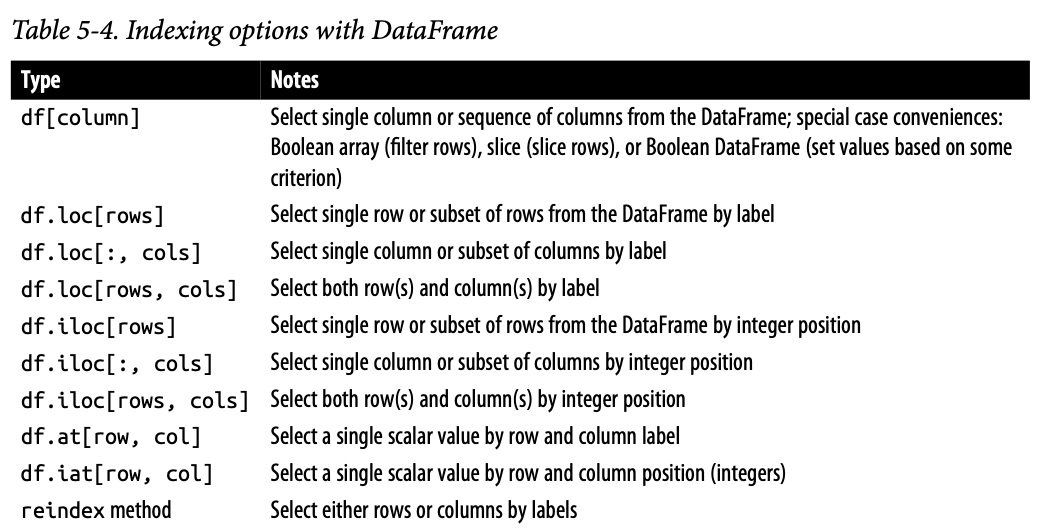

##### **🔍 Filtering (Lọc dữ liệu)**

- **Lọc theo điều kiện:**

In [170]:
obj[obj < 2]
data[data["three"] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


- **Lọc bằng mảng Boolean:**

In [171]:
filter_ = df['total'] >= 80
df[filter_]

KeyError: 'total'

##### **🧩 Slicing nâng cao**

- **Slicing bằng label với loc** (bao gồm cả điểm đầu và cuối):

In [ ]:
obj2.loc["b":"c"]

b    1.0
dtype: float64

- **Slicing bằng vị trí với iloc** (giống Python, loại trừ điểm cuối):

In [ ]:
obj2.iloc[1:3]

b    1.0
e    4.0
dtype: float64

##### **⚙️ Các accessor quan trọng**

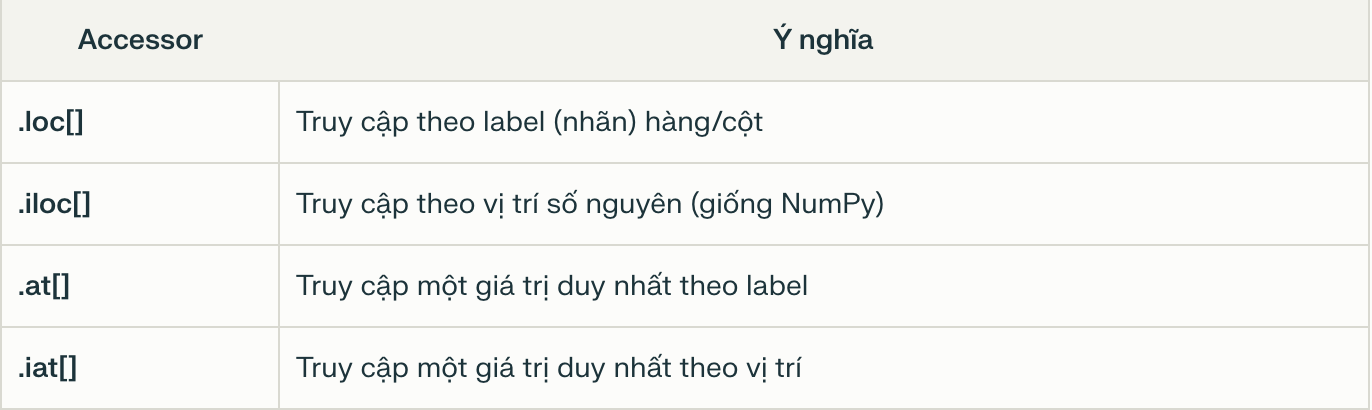

##### **💡 Mẹo & Lưu ý**

- `.loc[]`: Bao gồm cả điểm cuối khi slicing bằng label.

- `.iloc[]`: Loại trừ điểm cuối khi slicing bằng vị trí.

- **Tránh chained indexing** khi gán giá trị (ví dụ: df.loc[...]["col"] = ...) để không gặp cảnh báo **SettingWithCopyWarning**. Hãy dùng cú pháp đầy đủ:

In [ ]:
df.loc[điều_kiện, "col"] = giá_trị

#### **Arithmetic and Data Alignment**

- **Arithmetic (Số học)**: Thực hiện các phép toán như cộng, trừ, nhân, chia giữa các đối tượng pandas (**Series, DataFrame**).

- **Data Alignment (Căn chỉnh dữ liệu)**: pandas **tự động căn chỉnh các chỉ số** (index/columns) khi thực hiện phép toán, đảm bảo các giá trị đúng vị trí, và **chèn NaN** nếu không có dữ liệu tương ứng.

##### **🔗 Căn chỉnh dữ liệu khi tính toán với Series**

Khi cộng/trừ hai **Series** có index khác nhau, pandas sẽ:
- **Lấy hợp (union) của tất cả index**.
- Nếu một index chỉ xuất hiện ở một Series, kết quả tại vị trí đó là **NaN**.

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=["a", "c", "d", "e"])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=["a", "c", "e", "f", "g"])
result = s1 + s2
print(result)

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


##### **📊 Căn chỉnh dữ liệu khi tính toán với DataFrame**

- pandas **căn chỉnh cả hàng (index) lẫn cột (columns)** khi thực hiện phép toán giữa hai DataFrame.
- Kết quả sẽ chứa **toàn bộ index và columns xuất hiện ở cả hai DataFrame**.

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("bcd"), index=["Ohio", "Texas", "Colorado"])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"), index=["Utah", "Ohio", "Texas", "Oregon"])
result = df1 + df2
print(result)

            b   c     d   e
Colorado  NaN NaN   NaN NaN
Ohio      3.0 NaN   6.0 NaN
Oregon    NaN NaN   NaN NaN
Texas     9.0 NaN  12.0 NaN
Utah      NaN NaN   NaN NaN


**📝 Ghi chú:**
- Nếu **không có index/cột chung**, kết quả sẽ toàn NaN.
- Các phép toán này giúp **bảo toàn ngữ cảnh dữ liệu** khi kết hợp nhiều nguồn dữ liệu khác nhau

##### **⚙️ Điều khiển giá trị NaN khi tính toán**

Có thể chỉ định giá trị thay thế cho NaN khi thực hiện phép toán bằng các **phương thức linh hoạt** như `.add()`, `.sub()`, `.mul()`, v.v. với tham số `fill_value`.

In [ ]:
df1.add(df2, fill_value=0)

,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0


=> Các vị trí thiếu sẽ được thay bằng 0 trước khi tính toán

##### **🔄 Các phương thức số học linh hoạt**

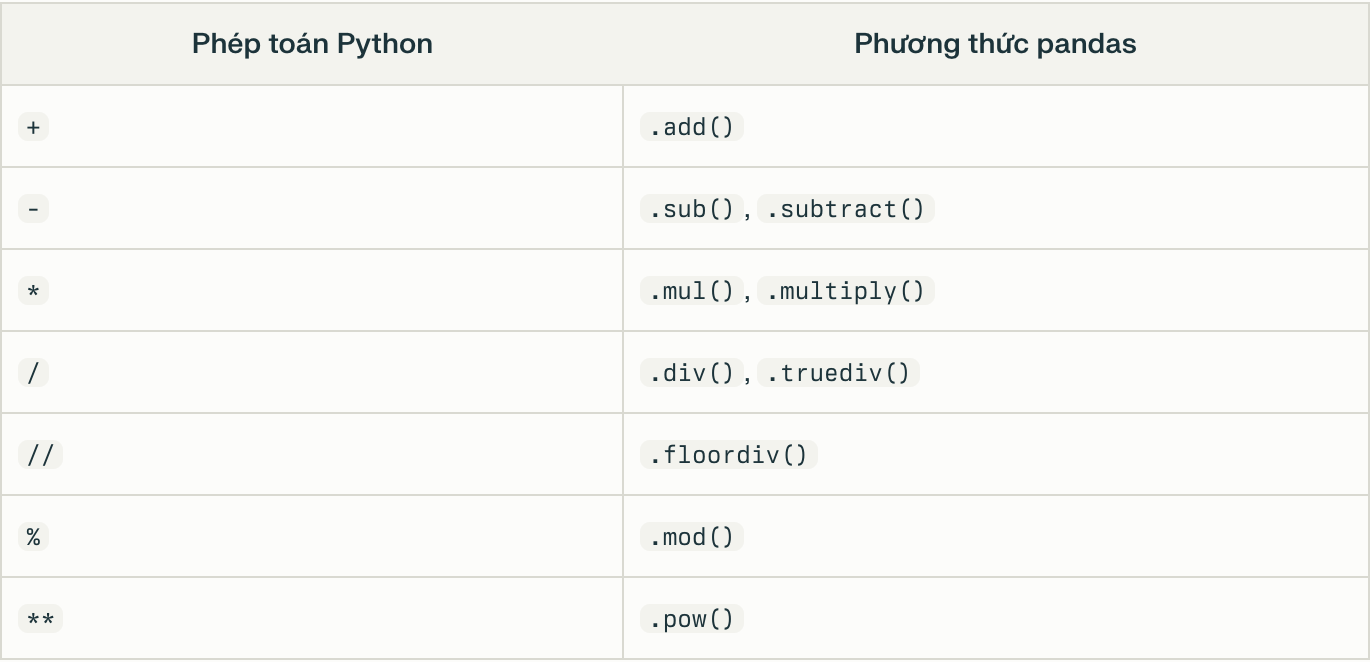

Mỗi phương thức đều có **phiên bản r (reverse)**, ví dụ: `.radd()`, `.rsub()` để đảo chiều phép toán.

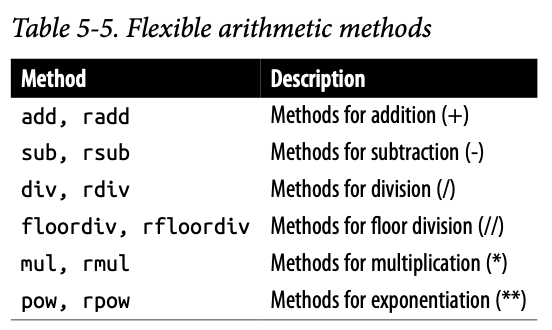

##### **🧩 Căn chỉnh dữ liệu với align()**

- `.align()` giúp đồng bộ index/columns giữa hai Series/DataFrame trước khi thực hiện phép toán.
- Có thể chọn kiểu join (`outer`, `inner`, `left`, `right`) và giá trị điền (`fill_value`).

In [ ]:
s1_aligned, s2_aligned = s1.align(s2, join='outer', fill_value=0)

-> Dùng align giúp kiểm soát tốt hơn quá trình căn chỉnh, đặc biệt khi thao tác trên dữ liệu thực tế phức tạp

##### **🧮 Phép toán giữa DataFrame và Series (Broadcasting)**

- Khi thực hiện phép toán giữa DataFrame và Series, pandas sẽ **căn chỉnh Series với từng cột của DataFrame** (theo mặc định).
- Nếu muốn căn chỉnh theo hàng, dùng tham số `axis`.

In [ ]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"), index=["Utah", "Ohio", "Texas", "Oregon"])
series = frame.iloc[0]
result = frame - series
result

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


-> Mỗi hàng của DataFrame sẽ trừ đi giá trị tương ứng trong Series (theo cột).

**Căn chỉnh theo hàng:**

In [ ]:
series3 = frame["d"]
result = frame.sub(series3, axis="index")
result

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


-> Mỗi cột của DataFrame sẽ trừ đi giá trị tương ứng theo hàng (index).

**⚠️ Lưu ý quan trọng**
- **NaN sẽ lan truyền** trong các phép toán nếu có index/column không khớp.
- Sử dụng các phương thức số học với fill_value để kiểm soát giá trị thiếu.
- Khi kết hợp nhiều nguồn dữ liệu, luôn kiểm tra kỹ index/columns để tránh mất dữ liệu quan trọng hoặc sinh ra quá nhiều NaN không mong muốn

#### **Function Application and Mapping**

##### **📚 NumPy ufuncs: Hàm xử lý từng phần tử**

- **NumPy ufuncs** (universal functions) là các hàm xử lý từng phần tử (element-wise) trên mảng, hỗ trợ vector hóa và broadcasting cực nhanh.
- Bạn có thể áp dụng trực tiếp các ufuncs lên **pandas Series/DataFrame** mà không cần vòng lặp thủ công.

In [ ]:
import numpy as np
import pandas as pd

frame = pd.DataFrame(np.random.standard_normal((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
print(np.abs(frame))  # Lấy giá trị tuyệt đối từng phần tử

               b         d         e
Utah    2.268829  0.993750  0.010022
Ohio    1.372651  1.008304  0.968199
Texas   0.792743  0.670501  0.546115
Oregon  0.257222  0.200478  0.108705


##### **🔄 Áp dụng hàm cho từng cột/hàng với `.apply()`**

- `.apply(function)` cho phép áp dụng một hàm lên từng **cột** (mặc định) hoặc từng **hàng** (axis="columns") của DataFrame.
- Hàm có thể trả về giá trị đơn (scalar) hoặc Series nhiều giá trị.

In [ ]:
def f1(x):
    return x.max() - x.min()

frame.apply(f1)  # Áp dụng trên từng cột
frame.apply(f1, axis="columns")  # Áp dụng trên từng hàng

Utah      2.258807
Ohio      2.340850
Texas     1.463245
Oregon    0.457699
dtype: float64

##### **🧩 Hàm trả về nhiều giá trị với `.apply()`**

In [ ]:
def f2(x):
    return pd.Series([x.min(), x.max()], index=["min", "max"])

frame.apply(f2)

,b,d,e
min,-0.257222,-0.670501,-0.968199
max,2.268829,1.008304,0.108705


-> Kết quả là DataFrame mới với nhiều dòng (min, max) cho mỗi cột.

##### **✨ Áp dụng hàm từng phần tử với `.applymap()` và `.map()`**

- `.applymap(function)`: Áp dụng hàm cho **từng phần tử** trong DataFrame (element-wise).
- `.map(function)`: Áp dụng hàm cho từng phần tử của **Series**.

In [ ]:
def my_format(x):
    return f"{x:.2f}"

frame.applymap(my_format)      # Định dạng toàn bộ DataFrame
frame["e"].map(my_format)      # Định dạng riêng cột "e"

/var/folders/bg/hsvxykxj7yx0jz1nrhc3k6z40000gn/T/ipykernel_47742/1911886233.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(my_format)      # Định dạng toàn bộ DataFrame


Utah       0.01
Ohio      -0.97
Texas     -0.55
Oregon     0.11
Name: e, dtype: object

##### **📝 Tóm tắt các phương thức áp dụng hàm**

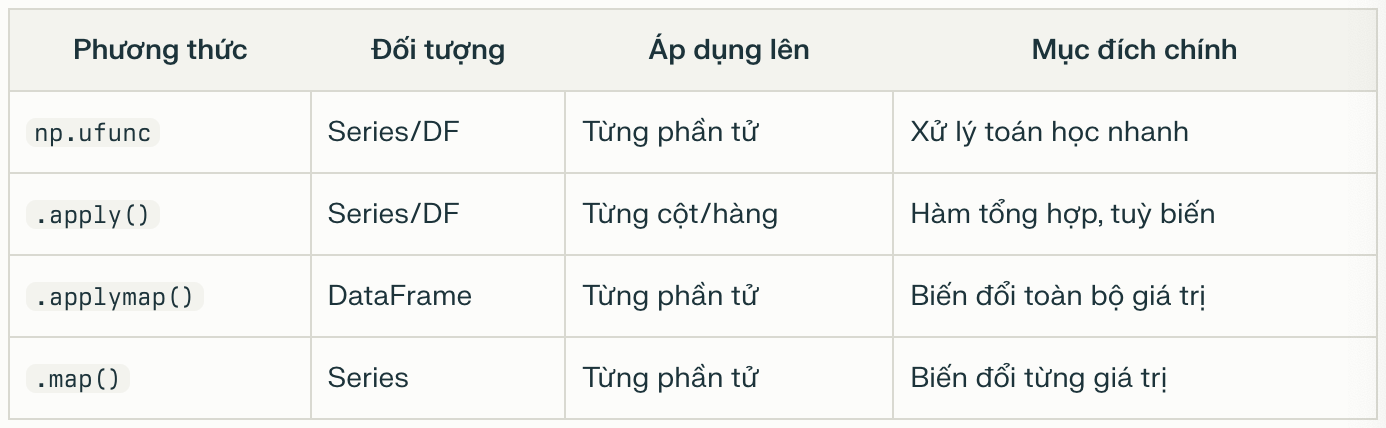

**💡 Lưu ý quan trọng**
- Các hàm thống kê cơ bản như `sum()`, `mean()` đã là phương thức riêng của pandas, dùng trực tiếp sẽ nhanh hơn `.apply()`.
- `.apply()` linh hoạt cho các hàm tuỳ biến, tổng hợp phức tạp.
- `.applymap()` và `.map() `phù hợp khi cần xử lý từng giá trị nhỏ lẻ (ví dụ: định dạng, chuyển đổi kiểu).

#### **Sorting and Ranking**

##### **📚 Sắp xếp theo chỉ số (index) với `sort_index()`**

- `sort_index()` dùng để sắp xếp **Series** hoặc **DataFrame** theo **index** (hàng hoặc cột), mặc định là tăng dần.
- Có thể chọn sắp xếp **hàng** (axis=0) hoặc **cột** (axis=1), tăng/giảm (ascending), vị trí NaN (na_position), v.v.

In [ ]:
obj = pd.Series(np.arange(4), index=["d", "a", "b", "c"])
obj.sort_index() 

a    1
b    2
c    3
d    0
dtype: int64

**Với DataFrame:**

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=["three", "one"],
                     columns=["d", "a", "b", "c"])

In [ ]:
frame.sort_index()  # Sắp xếp theo index hàng

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [ ]:
frame.sort_index(axis="columns")  # Sắp xếp theo tên cột

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [ ]:
frame.sort_index(axis="columns", ascending=False)  # Giảm dần theo cột

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


##### **🔍 Sắp xếp theo giá trị với `sort_values()`**

- `sort_values()` sắp xếp **Series** hoặc **DataFrame** dựa trên **giá trị**.
- Với DataFrame, có thể sắp xếp theo 1 hoặc nhiều cột.

In [ ]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()  # Kết quả: -3, 2, 4, 7

# NaN mặc định sẽ được đẩy xuống cuối
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()  # Kết quả: -3, 2, 4, 7, NaN, NaN

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [ ]:
obj.sort_values(na_position="first")  # Đẩy NaN lên đầu

1    NaN
3    NaN
4   -3.0
5    2.0
0    4.0
2    7.0
dtype: float64

**Với DataFrame:**

In [ ]:
frame = pd.DataFrame({"b": [4, 7, -3, 2], "a": [0, 1, 0, 1]})
frame.sort_values("b")  # Sắp xếp theo cột "b"

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [ ]:
frame.sort_values(["a", "b"])  # Sắp xếp theo nhiều cột

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


##### **🏅 Xếp hạng (Ranking) với `rank()`**

- `rank()` gán thứ hạng cho từng giá trị trong Series/DataFrame, mặc định từ nhỏ đến lớn.
- Nếu có giá trị trùng, mặc định lấy **trung bình thứ hạng** ("average").

In [ ]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()  

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [ ]:
obj.rank(method="first")  # Xếp hạng theo thứ tự xuất hiện

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [ ]:
obj.rank(ascending=False)  # Xếp hạng giảm dần

0    1.5
1    7.0
2    1.5
3    3.5
4    5.0
5    6.0
6    3.5
dtype: float64

**Các phương pháp xử lý giá trị trùng (`method`):**

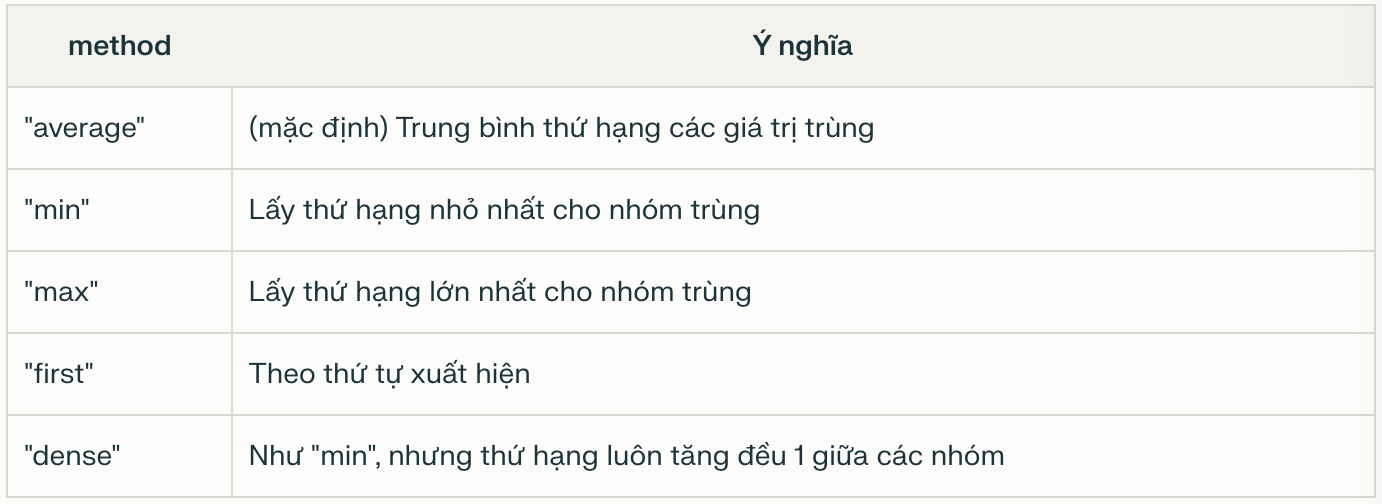

**Với DataFrame:**

In [ ]:
frame = pd.DataFrame({"b": [4.3, 7, -3, 2], "a": [0, 1, 0, 1], "c": [-2, 5, 8, -2.5]})
frame.rank(axis="columns")  # Xếp hạng từng dòng

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


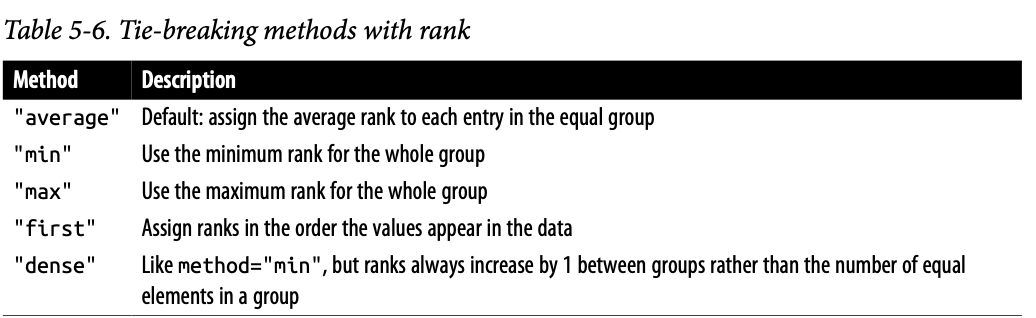

#### **Axis Indexes with Duplicate Labels**

##### **📚 Có thể có index trùng lặp trong pandas không?**

- **Có!** Trong pandas, **index (nhãn hàng hoặc cột)** không bắt buộc phải duy nhất. Bạn hoàn toàn có thể có nhiều dòng/cột cùng một nhãn.
- Điều này khác với nhiều hệ thống dữ liệu khác (ví dụ SQL), nơi khóa chính phải duy nhất. pandas chấp nhận điều này để xử lý dữ liệu thực tế, vốn thường "lộn xộn" và có thể có trùng lặp

##### **🔍 Hành vi khi index trùng lặp**

**- Kiểm tra trùng lặp:**

Dùng `.is_unique` để kiểm tra index có duy nhất không.

In [ ]:
obj.index.is_unique

True

- **Chọn dữ liệu:**

- Nếu bạn truy cập một nhãn **trùng lặp**, pandas trả về **Series** gồm tất cả giá trị cùng nhãn đó.
- Nếu nhãn **duy nhất**, trả về giá trị (scalar) hoặc Series thông thường.

In [ ]:
obj = pd.Series([0, 1, 2, 3, 4], index=["a", "a", "b", "b", "c"])
obj["a"]  # Trả về Series gồm 2 giá trị

a    0
a    1
dtype: int64

In [ ]:
obj["c"]  # Trả về giá trị đơn

4

- **Một số thao tác sẽ báo lỗi hoặc cho kết quả khó đoán:**  
Ví dụ, `.reindex()` yêu cầu index phải duy nhất, nếu không sẽ báo lỗi.

##### **🧩 Xử lý index trùng lặp**

- **Phát hiện vị trí trùng lặp:**

Dùng `.index.duplicated()` để trả về mảng boolean đánh dấu các vị trí trùng lặp:

In [ ]:
obj.index.duplicated() 

array([False,  True, False,  True, False])

- **Loại bỏ dòng trùng lặp (giữ lại lần xuất hiện đầu tiên):**

In [ ]:
df = pd.DataFrame({'A': [1, 2, 3, 2], 'B': [4, 5, 6, 7]}, index=['a', 'b', 'b', 'c'])

df = df[~df.index.duplicated(keep='first')]
print(df)

   A  B
a  1  4
b  2  5
c  2  7


- `keep='first'`: Giữ lại lần đầu, loại các lần sau.

- `keep='last'`: Giữ lại lần cuối, loại các lần trước.

- `keep=False`: Loại bỏ tất cả các dòng trùng lặp.

- **Xử lý nâng cao bằng groupby:**

Nếu muốn gộp các dòng trùng lặp (ví dụ lấy trung bình, tổng...), dùng:

In [ ]:
df.groupby(level=0).mean()

,A,B
a,1.0,4.0
b,2.0,5.0
c,2.0,7.0


=> **Nên kiểm tra và xử lý index trùng lặp** trước khi thực hiện các thao tác tổng hợp, phân tích hoặc lưu trữ dữ liệu.

### **5.3 Summarizing and Computing Descriptive Statistics**

- pandas cung cấp nhiều **phương thức toán học và thống kê** để tóm tắt, mô tả dữ liệu nhanh chóng trên **Series** và **DataFrame**.
- Các hàm này tự động **bỏ qua giá trị thiếu (NaN)**, giúp xử lý dữ liệu thực tế dễ dàng hơn so với NumPy thuần túy.

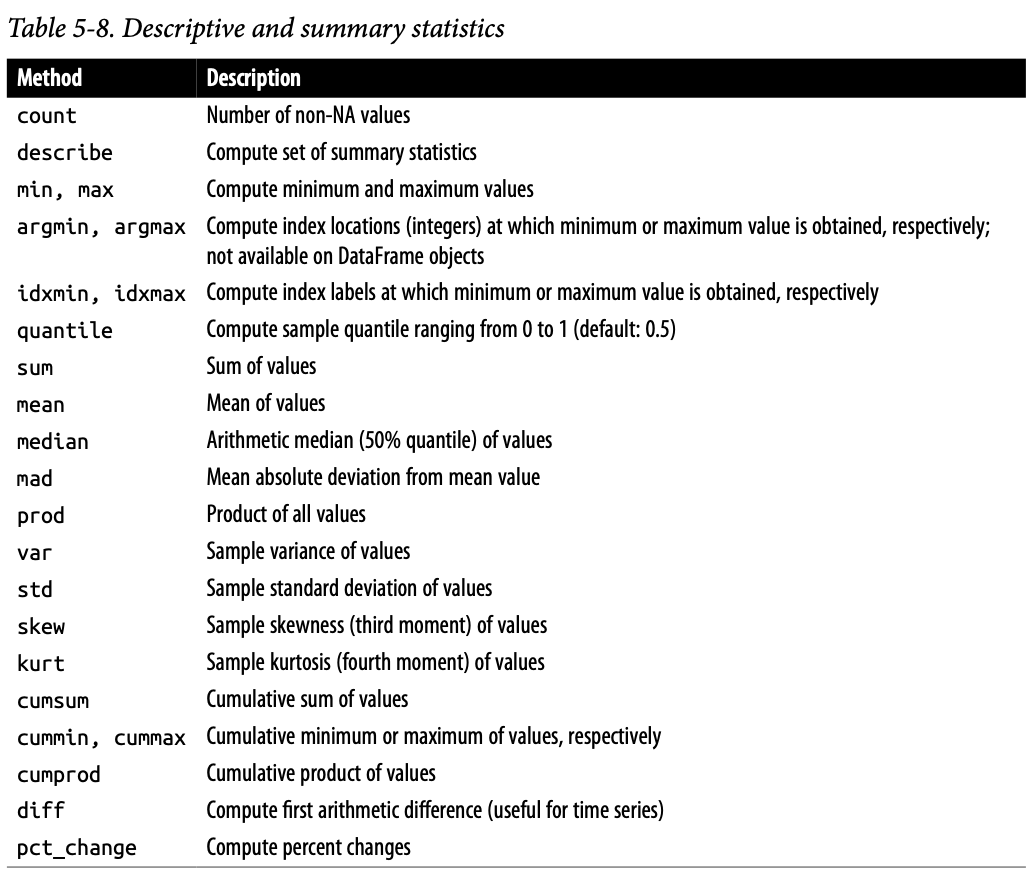

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                  index=["a", "b", "c", "d"], columns=["one", "two"])

df.sum()  # Tổng từng cột

one    9.25
two   -5.80
dtype: float64

In [ ]:
df.sum(axis="columns")  # Tổng từng dòng

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:
df.mean()  # Trung bình từng cột

one    3.083333
two   -2.900000
dtype: float64

In [ ]:
df.describe()  # Thống kê tổng hợp

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


##### **🧩 Xử lý giá trị thiếu (NaN)**

- Mặc định, các hàm bỏ qua NaN (`skipna=True`).
- Nếu muốn không bỏ qua NaN, truyền `skipna=False`:

In [172]:
df.sum(skipna=False)

one   NaN
two   NaN
dtype: float64

##### **🏷️ Một số hàm thống kê đặc biệt**

- **`idxmin()`, `idxmax()`**: Trả về **index** có giá trị nhỏ nhất/lớn nhất.

- **`cumsum()`, `cummin()`, `cummax()`, `cumprod()`**: Tính toán tích lũy (cộng dồn, min/max dồn, tích dồn).

- **`diff()`, `pct_change()`**: Hiệu số và % thay đổi giữa các giá trị liên tiếp.

- **`mad()`**: Độ lệch tuyệt đối trung bình.

- **`skew()`, `kurt()`**: Độ lệch, độ nhọn phân phối.

**💡 Lưu ý khi dùng thống kê mô tả trong pandas**
- Các hàm đều có thể tính theo **hàng** (`axis="columns"`) hoặc **cột** (mặc định).

- Khi dữ liệu có nhiều NaN, hãy chú ý đến tham số `skipna`.

- Dùng level để tính toán theo từng nhóm nếu index là MultiIndex.

#### **Correlation and Covariance**

**Ví dụ**

**1. Chuẩn bị dữ liệu**

- **Đọc dữ liệu** từ file pickle (định dạng lưu trữ của Python):

In [180]:
price = pd.read_pickle("examples/yahoo_price.pkl")  # Giá cổ phiếu
volume = pd.read_pickle("examples/yahoo_volume.pkl")  # Khối lượng giao dịch

In [181]:
price

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571
...,...,...,...,...
2016-10-17,117.550003,779.960022,154.770004,57.220001
2016-10-18,117.470001,795.260010,150.720001,57.660000
2016-10-19,117.120003,801.500000,151.259995,57.529999


In [182]:
volume

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,123432400,3927000,6155300,38409100
2010-01-05,150476200,6031900,6841400,49749600
2010-01-06,138040000,7987100,5605300,58182400
2010-01-07,119282800,12876600,5840600,50559700
2010-01-08,111902700,9483900,4197200,51197400
...,...,...,...,...
2016-10-17,23624900,1089500,5890400,23830000
2016-10-18,24553500,1995600,12770600,19149500
2016-10-19,20034600,116600,4632900,22878400


- **Tính lợi suất hàng ngày** (percent change):

In [179]:
returns = price.pct_change()  # Lợi suất = (Giá hôm nay - Giá hôm qua) / Giá hôm qua
returns

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.013331,0.010035,0.006897
...,...,...,...,...
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255


**2. Tính tương quan và hiệp phương sai giữa hai cổ phiếu**

- **Tương quan (Correlation)** giữa hai cổ phiếu (ví dụ: MSFT và IBM):

In [177]:
correlation = returns["MSFT"].corr(returns["IBM"])  # ~0.4998
correlation

0.49976361144151155

→ Giá trị **0.4998** cho thấy MSFT và IBM có **tương quan thuận vừa phải**: Khi một cổ phiếu tăng, cổ phiếu kia có xu hướng tăng theo (không mạnh).

- **Hiệp phương sai (Covariance)** giữa hai cổ phiếu:

In [183]:
covariance = returns["MSFT"].cov(returns["IBM"])  # ~8.87e-05
covariance

8.870655479703546e-05

→ Hiệp phương sai dương cho thấy hai cổ phiếu biến động cùng chiều.

**3. Ma trận tương quan và hiệp phương sai**

- **Ma trận tương quan** cho tất cả cổ phiếu:

In [184]:
correlation_matrix = returns.corr()
correlation_matrix

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000


→ Đường chéo chính luôn bằng 1 (tương quan của một cổ phiếu với chính nó).

- **Ma trận hiệp phương sai:**

In [185]:
covariance_matrix = returns.cov()
covariance_matrix

,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


**4. Tính tương quan với một Series/DataFrame khác**

- **Tương quan giữa các cổ phiếu và IBM:**

In [186]:
corr_with_IBM = returns.corrwith(returns["IBM"])
corr_with_IBM

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

→ Mỗi cột trong `returns` được so sánh với cột IBM.

- **Tương quan giữa lợi suất và khối lượng giao dịch:**

In [187]:
corr_with_volume = returns.corrwith(volume)
corr_with_volume

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

→ Kết quả âm (-0.0755 đến -0.2048) cho thấy lợi suất và khối lượng giao dịch có **mối quan hệ nghịch yếu**.

**📝 Giải thích kết quả**
- **Tương quan (Correlation):**

    - **1**: Tương quan thuận hoàn hảo.

    - **-1**: Tương quan nghịch hoàn hảo.

    - **0**: Không có mối quan hệ tuyến tính.

    - **|Giá trị| > 0.6**: Tương quan mạnh; **< 0.3**: Tương quan yếu.


- **Hiệp phương sai (Covariance):**

    - **Dương:** Hai biến cùng chiều biến động.

    - **Âm:** Hai biến ngược chiều biến động.

    - **Độ lớn**: Phụ thuộc vào đơn vị, khó so sánh trực tiếp → Thường dùng correlation để chuẩn hóa.

**💡 Ứng dụng thực tế**
- **Đa dạng hóa danh mục đầu tư**: Chọn các cổ phiếu có tương quan thấp để giảm rủi ro.
- **Phân tích yếu tố ảnh hưởng**: Ví dụ, khối lượng giao dịch có tương quan với biến động giá không?
- **Dự báo xu hướng**: Cổ phiếu A tăng, cổ phiếu B có xu hướng tăng theo (nếu tương quan cao).

**⚠️ Lưu ý**
- **Pearson (mặc định)**: Giả định mối quan hệ tuyến tính, nhạy cảm với outlier.
- **Kendall/Spearman**: Dùng khi dữ liệu không tuân theo phân phối chuẩn hoặc có outliers.
- **NaN values**: Tự động bỏ qua khi tính toán.

#### **Unique Values, Value Counts, and Membership**

##### **Giá trị Duy nhất với `unique()`**

**Chức năng:** Trả về mảng chứa các giá trị duy nhất trong Series/DataFrame.

In [188]:
import pandas as pd

obj = pd.Series(["c", "a", "d", "a", "a", "b", "b", "c", "c"])
uniques = obj.unique()
print(uniques)

['c' 'a' 'd' 'b']


**📌 Lưu ý:** Kết quả không được sắp xếp. Nếu cần, dùng `np.sort(uniques)`.

##### **Đếm Tần suất với `value_counts()`**

**Chức năng:** Đếm số lần xuất hiện của từng giá trị duy nhất, mặc định sắp xếp giảm dần.

In [189]:
counts = obj.value_counts()
print(counts)

c    3
a    3
b    2
d    1
Name: count, dtype: int64


**Tùy chọn:**

- `sort=False`: Không sắp xếp kết quả.

- `normalize=True`: Trả về tỷ lệ phần trăm thay vì số lượng.

In [190]:
pd.value_counts(obj, sort=False, normalize=True)

/var/folders/bg/hsvxykxj7yx0jz1nrhc3k6z40000gn/T/ipykernel_47742/2033190225.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(obj, sort=False, normalize=True)


c    0.333333
a    0.333333
d    0.111111
b    0.222222
Name: proportion, dtype: float64

##### **Kiểm tra Thành viên với `isin()`**

**Chức năng:** Tạo mask boolean để kiểm tra phần tử có thuộc danh sách chỉ định không

In [191]:
mask = obj.isin(["b", "c"])
print(mask)

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool


In [192]:
# Lọc dữ liệu theo mask
filtered = obj[mask]
print(filtered)

0    c
5    b
6    b
7    c
8    c
dtype: object


##### **Áp dụng cho Nhiều Cột trong DataFrame**

**Đếm tần suất cho từng cột:**

In [193]:
data = pd.DataFrame({
    "Qu1": [1, 3, 4, 3, 4],
    "Qu2": [2, 3, 1, 2, 3],
    "Qu3": [1, 5, 2, 4, 4]
})

# Đếm tần suất cho tất cả cột
result = data.apply(pd.value_counts).fillna(0)
print(result)

   Qu1  Qu2  Qu3
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0


/var/folders/bg/hsvxykxj7yx0jz1nrhc3k6z40000gn/T/ipykernel_47742/717144222.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  result = data.apply(pd.value_counts).fillna(0)


##### **Đếm Dòng Duy nhất với `DataFrame.value_counts()`**

**Chức năng:** Đếm số lần xuất hiện của từng dòng duy nhất trong DataFrame.

In [194]:
data = pd.DataFrame({"a": [1, 1, 1, 2, 2], "b": [0, 0, 1, 0, 0]})
print(data.value_counts())

a  b
1  0    2
2  0    2
1  1    1
Name: count, dtype: int64


**📌 Lưu ý:** Kết quả có index phân cấp (MultiIndex) đại diện cho các dòng duy nhất.